# Financial Data Analysis with Power BI Sample Dataset
This notebook performs exploratory data analysis (EDA) and basic data visualization using Power BI on a sample financial dataset. The key tasks and analyses covered in this project include:

✅ **Data Processing & Cleaning**

Loaded a sample financial Excel file into a pandas DataFrame.

Inspected data structure and cleaned missing or null values.

Converted data types where necessary (e.g., dates and currency formats).

📈 **Exploratory Data Analysis (EDA)**

Analyzed revenue trends by:

Country

Product

Customer Segment

Date

Aggregated KPIs like Total Sales, Profit, Quantity Sold, and Gross Margin.

Identified top-performing regions and products.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Financial Sample.xlsx")

In [3]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [4]:
data.shape

(700, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [6]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [7]:
data.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

There are null values in Discount Band column.

In [8]:
data['Discount Band'].iloc[200:400]

200       Low
201       Low
202       Low
203       Low
204       Low
        ...  
395    Medium
396    Medium
397    Medium
398    Medium
399    Medium
Name: Discount Band, Length: 200, dtype: object

Thus, the column has string data type values : Low, Medium, and High. Let's replace null values with 'No Discount'

In [9]:
data['Discount Band'] = data['Discount Band'].fillna('No Discount')

In [10]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,No Discount,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,No Discount,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,No Discount,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,No Discount,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,No Discount,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [11]:
#Convert date from string to datetime data type

data['Date'] = pd.to_datetime(data['Date'])

In [12]:
print(data['Date'].dtype)

datetime64[ns]


In [13]:
data[['Date', 'Month Number', 'Month Name', 'Year']].head() #To check consistency of data records

,Date,Month Number,Month Name,Year
0,2014-01-01,1,January,2014
1,2014-01-01,1,January,2014
2,2014-06-01,6,June,2014
3,2014-06-01,6,June,2014
4,2014-06-01,6,June,2014


**To simplify creating visualizations in Power BI, let's create some new columns based on existing ones.**

In [14]:
data1 = data.copy()

In [15]:
data1

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,No Discount,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,No Discount,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,No Discount,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,No Discount,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,No Discount,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [16]:
data1.columns = data1.columns.str.strip()

In [17]:
data1['% Profit Margin'] = round((data1['Profit']/ data1['Sales'])*100, 2)

In [18]:
data1

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,% Profit Margin
0,Government,Canada,Carretera,No Discount,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,50.00
1,Government,Germany,Carretera,No Discount,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,50.00
2,Midmarket,France,Carretera,No Discount,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,33.33
3,Midmarket,Germany,Carretera,No Discount,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014,33.33
4,Midmarket,Mexico,Carretera,No Discount,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014,33.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014,1.96
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014,1.96
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014,15.97
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014,15.97


**Let's transform continuous sales values into meaningful categories, which makes the data easier to analyze, group, and visualize.**

We are using pd.cut( ), a pandas function used to divide continuous values into discrete bins.

In [19]:
data1['Sales Category'] = pd.cut(data1['Sales'], 
                                 bins = [0, 100000, 300000, data1['Sales'].max() ], 
                                 labels= ['Low', 'Medium', 'High'])

In [20]:
data1

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,% Profit Margin,Sales Category
0,Government,Canada,Carretera,No Discount,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,50.00,Low
1,Government,Germany,Carretera,No Discount,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,50.00,Low
2,Midmarket,France,Carretera,No Discount,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,33.33,Low
3,Midmarket,Germany,Carretera,No Discount,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014,33.33,Low
4,Midmarket,Mexico,Carretera,No Discount,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014,33.33,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014,1.96,High
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014,1.96,Medium
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014,15.97,Low
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014,15.97,Low


In [21]:
# Save the transformed dataset to a CSV file
data1.to_csv('transformed_sales_data.csv', index=False)

**Now, data1 is our final dataset and we will visualize it using Power BI**

In [22]:
data1['Sales'].max()

1159200.0

In [23]:
data1['Sales'].sum()

118726350.25999999

In [24]:
data1['Sales'].mean()

169609.07179999998

In [25]:
# Suppose I want 15% higher sales in the next year
# Total actual sales in 2014
actual_sales_2014 = data1['Sales'].sum()

growth_rate = 0.15
target_sales_2014 = actual_sales_2014 * (1 + growth_rate)

# Print rounded values
print("Actual Sales (2014):", round(actual_sales_2014, 2))
print("Target Sales (2014, +15%):", round(target_sales_2014, 2))

Actual Sales (2014): 118726350.26
Target Sales (2014, +15%): 136535302.8


# Power BI Dahsboard: 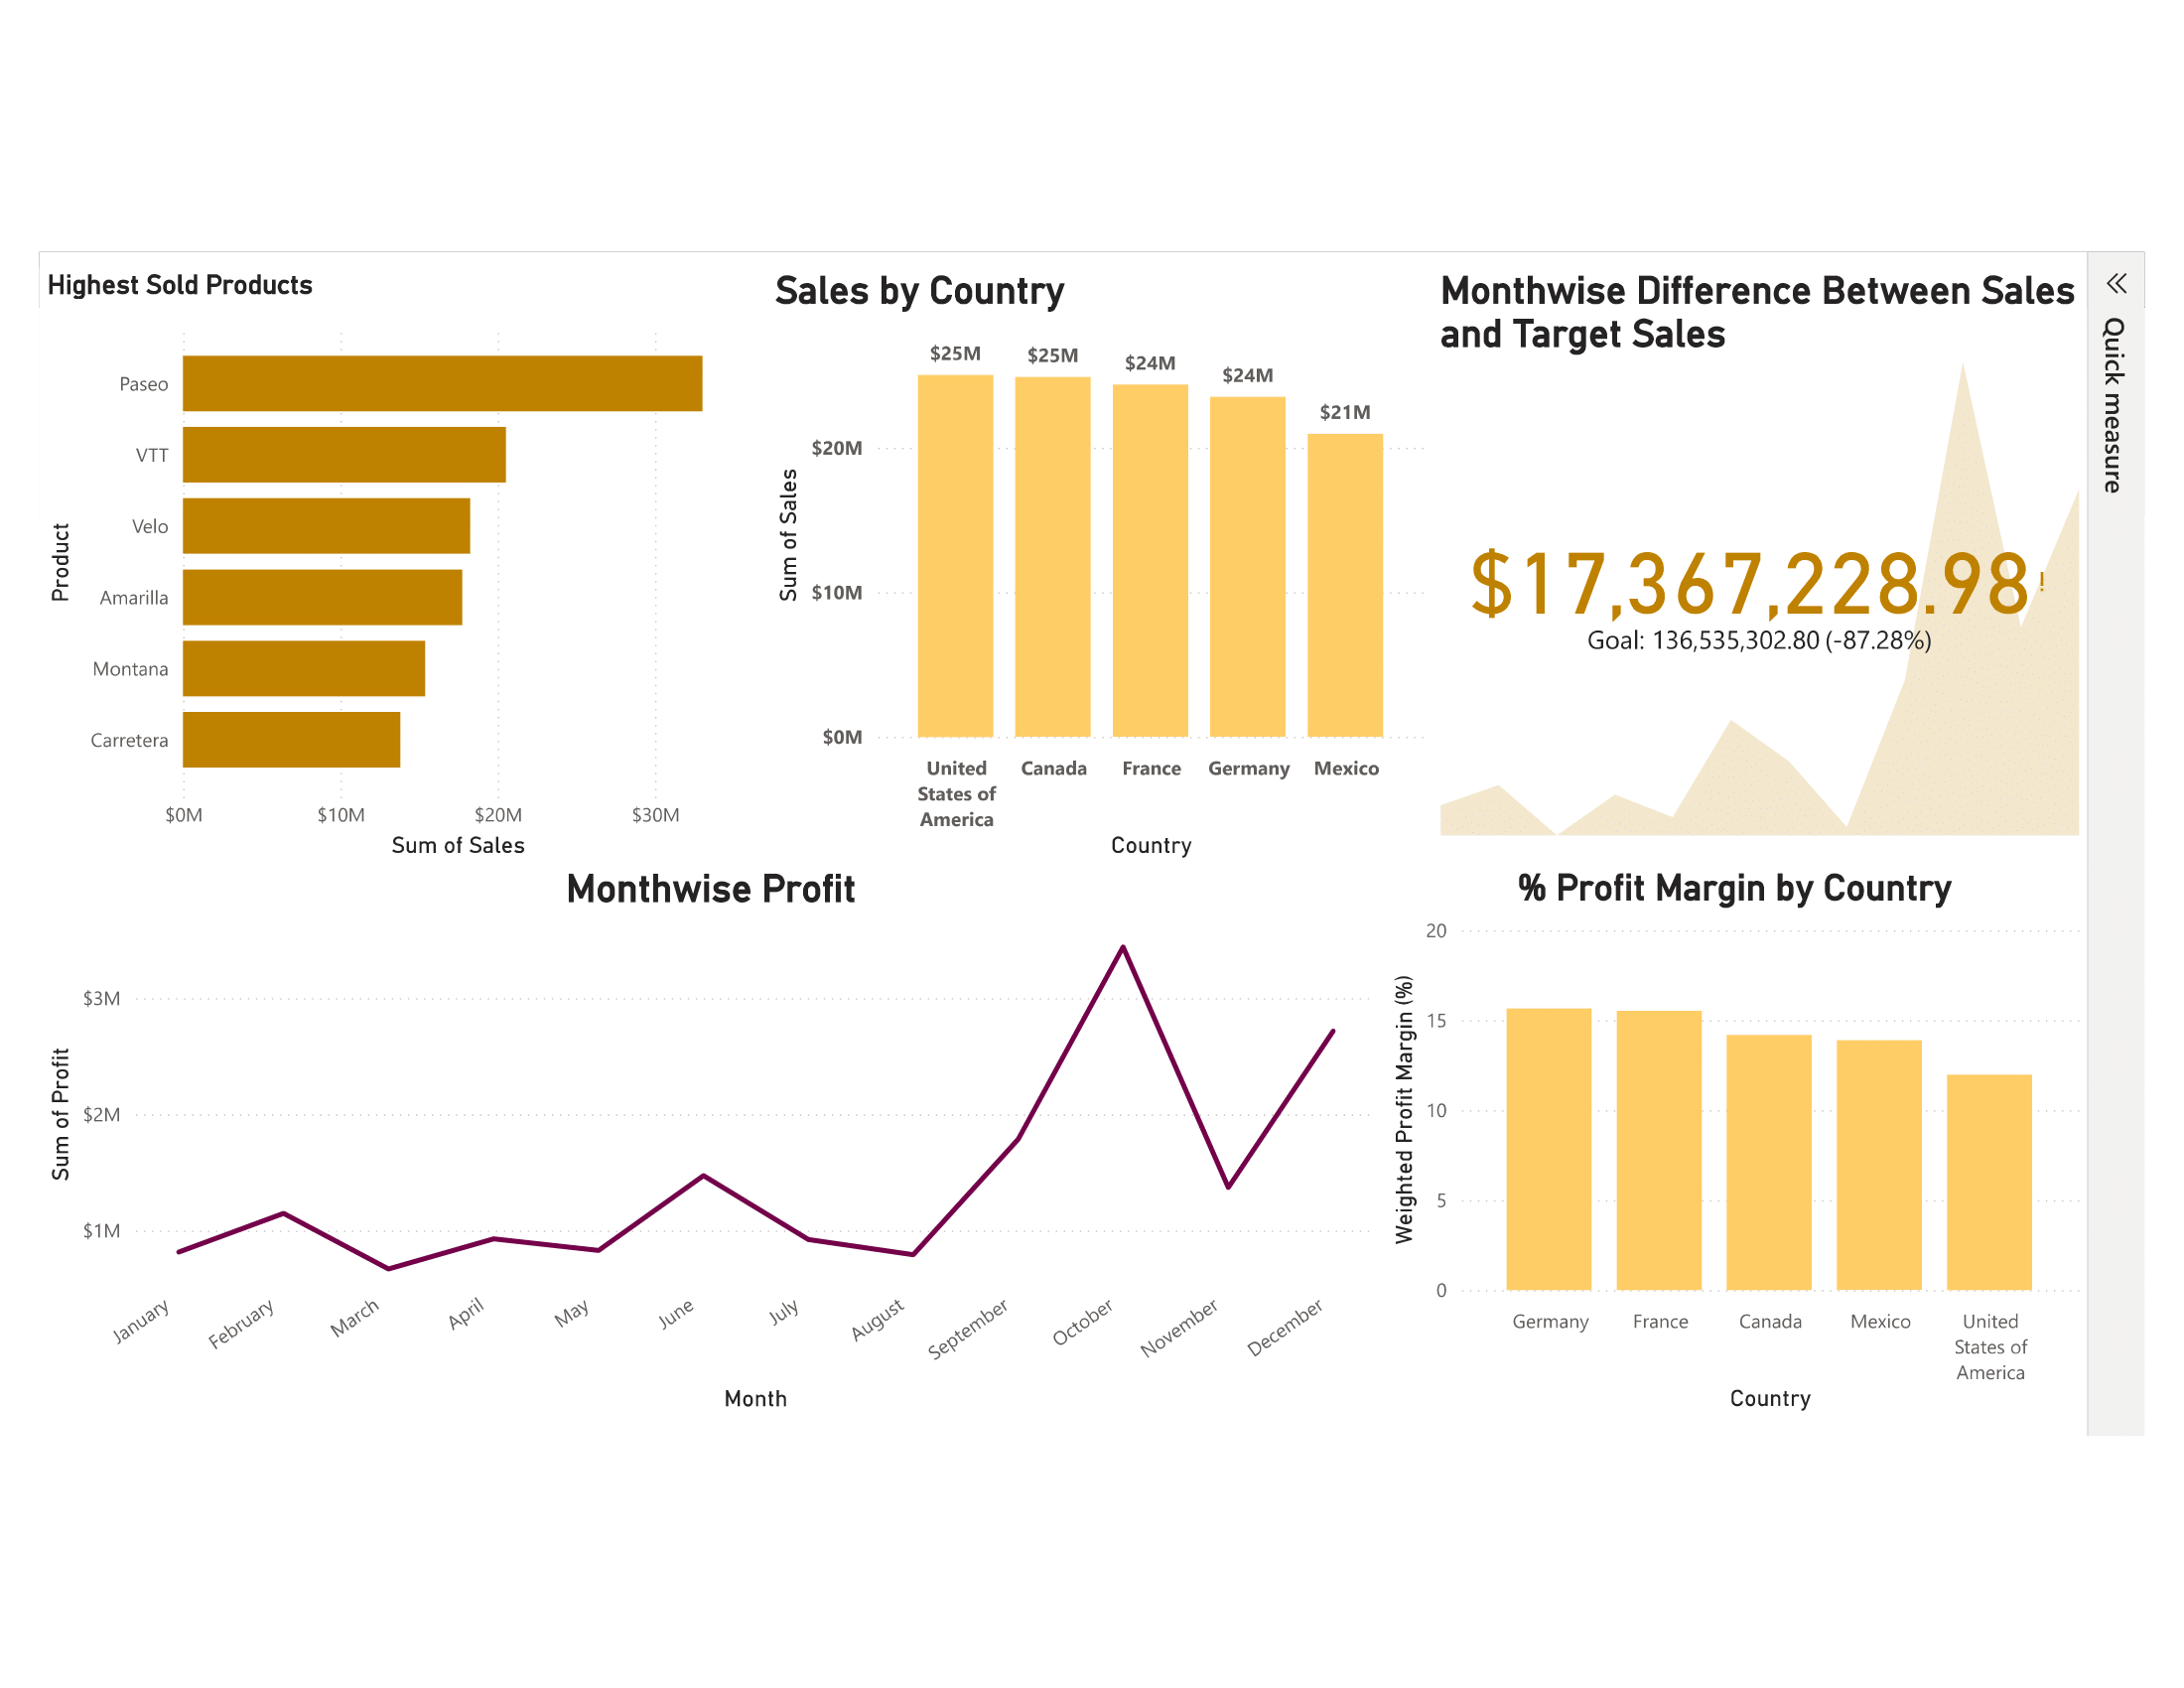

# 📊 Power BI Dashboard Breakdown & Insights
This dashboard visualizes financial performance metrics based on a sample dataset, offering a clear view of product sales, country performance, monthly trends, and profitability.

1. **Highest Sold Products (Bar Chart - Left)**

What it shows: Total sales by product.

_**Insight**_:

Paseo is the top-selling product, followed by VTT and Velo.

The sales gap between Paseo and other products is significant, suggesting it's a flagship product driving revenue.

Focused marketing or bundling around Paseo might yield strong returns.

2. **Sales by Country (Bar Chart - Top Center)**

What it shows: Total sales aggregated by country.

_**Insight**_:

The United States and Canada lead with $25M in sales each, followed closely by France and Germany.

Mexico lags behind, suggesting potential to expand market penetration there or investigate barriers to higher sales.

3. **Monthwise Difference Between Sales and Target Sales (Area Chart - Top Right)**

What it shows: Total shortfall or surplus of sales against the set target on a monthly basis.

_**Insight**_:

A large negative gap is observed.

only $17.3M achieved against the goal of $136.5M (an 87.28% shortfall).

This indicates either unrealistic targets or underperformance; further root-cause analysis is needed.

The peaks suggest occasional improvement, but sustainability is lacking.

4. **Monthwise Profit (Line Graph - Bottom Left)**

What it shows: Total profit by month.

_**Insight**_:

Profit shows fluctuation throughout the year, with October and November showing the highest profit levels (over $3M).

There might be seasonality or end-of-year promotional impacts.

August and July appear weaker; this may be an opportunity to optimize operations or boost promotions mid-year.

5. **% Profit Margin by Country (Bar Chart - Bottom Right)**

What it shows: Weighted profit margin percentage by country.

_**Insight**_:

Germany and France maintain the highest margins, around 16–17%.

Mexico and the USA have relatively lower margins, potentially due to high operating costs or pricing strategies.

High-revenue countries with low profit margins could benefit from cost optimization or pricing revisions.

🚀 **Summary of Key Insights**

Paseo is the clear product leader—likely a key revenue driver.

North American markets (USA, Canada) generate high sales but may have lower margins.

Sales performance is inconsistent, and target goals are being missed by a wide margin.

October and November are peak profit months—strategies for other months may need realignment.

Countries like Germany combine solid margins with decent sales—these might be model markets for future expansion.

